In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))


key_1.csv
key_1.csv.zip
sample_submission_1.csv
sample_submission_1.csv.zip
train_1.csv
train_1.csv.zip



In [2]:
# keys_ = pd.read_csv("input/key_1.csv")
train_ = pd.read_csv("input/train_1.csv").fillna(0)
# sample_ = pd.read_csv("input/sample_submission_1.csv")

train_.head()

In [3]:
train_.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [42]:
keys_.shape[0]
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 552 entries, Page to lang
dtypes: int32(550), object(2)
memory usage: 306.6+ MB


In [3]:
for col in train_.columns[1:]:
    train_[col] = pd.to_numeric(train_[col],downcast='integer')
train_.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10


In [50]:
# train_.set_index('Page',inplace=True)
train_.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,24,...,32,63,15,26,14,20,22,19,18,20
2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,4,...,17,42,28,15,9,30,52,45,26,20
3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,4,...,3,1,1,7,4,4,6,3,4,17
4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,16,...,32,10,26,27,16,11,17,19,10,11
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,0,0,0,0,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10


# Extending the Dataset using GoogleTrends Data.
## Get Topic.

In [7]:
import re

def get_topics(page):
    res = re.findall('.+?(?=_[a-z][a-z].wikipedia)',page)
    return res

topics = train_.Page.map(get_topics)

In [8]:
# Max Data per time is around 264.
# for topic in topics:
#     pytrends.build_payload(kw_list=[topic],timeframe='2015-07-01 2016-01-01')
#     i_o_t = pytrends.interest_over_time()
dates = ['2015-07-01 ', '2016-03-15', '2016-03-16 ', '2016-11-15', '2016-11-16 ', '2016-12-31']
pytrends.build_payload(kw_list=['2NE1'],timeframe=str(dates[0])+str(dates[1]))
i_o_t = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['2NE1'],timeframe=str(dates[2])+str(dates[3]))
i_o_t_2 = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['2NE1'],timeframe=str(dates[4])+str(dates[5]))
i_o_t_3 = pytrends.interest_over_time()

In [11]:
pytrends.build_payload(kw_list=['2PM'],timeframe=str(dates[0])+str(dates[1]))
i_o_t = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['2PM'],timeframe=str(dates[2])+str(dates[3]))
i_o_t_2 = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['2PM'],timeframe=str(dates[4])+str(dates[5]))
i_o_t_3 = pytrends.interest_over_time()

In [12]:
# i_o_t_m = i_o_t.merge(right=i_o_t_2,how='left')
# i_o_t_m = i_o_t_m.merge(right=i_o_t_3,how='left')
i_o_t_m_2 = pd.concat([i_o_t, i_o_t_2, i_o_t_3])


In [27]:
# print(i_o_t.info())
# print(i_o_t_2.info())
# i_o_t.set_index('date')
# i = i_o_t_m.append(i_o_t_m_2)
i_o_t_m.info()
# i_o_t_m['2015-07-01']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 1 columns):
2NE1    550 non-null int64
dtypes: int64(1)
memory usage: 8.6 KB


In [28]:
i_o_t_m.head()


,2NE1
date,
2015-07-01,20
2015-07-02,20
2015-07-03,20
2015-07-04,26
2015-07-05,23


In [49]:
i = i_o_t.merge(right=i_o_t_2, on='date',how='left')
# print(n_iot)
# n_iot = i_o_t.values
# print(n_iot.shape)
# print(n_iot)
# np.reshape(n_iot,(1,185))
# print(n_iot.shape)

KeyError: 'date'

In [14]:
np.array(topics).shape

(145063,)

In [4]:
import re

def get_language(page):
    res = re.findall('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

train_['lang'] = train_.Page.map(get_language)




In [5]:
train_.head()
from collections import Counter
print(Counter(train_.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


# Visits trend

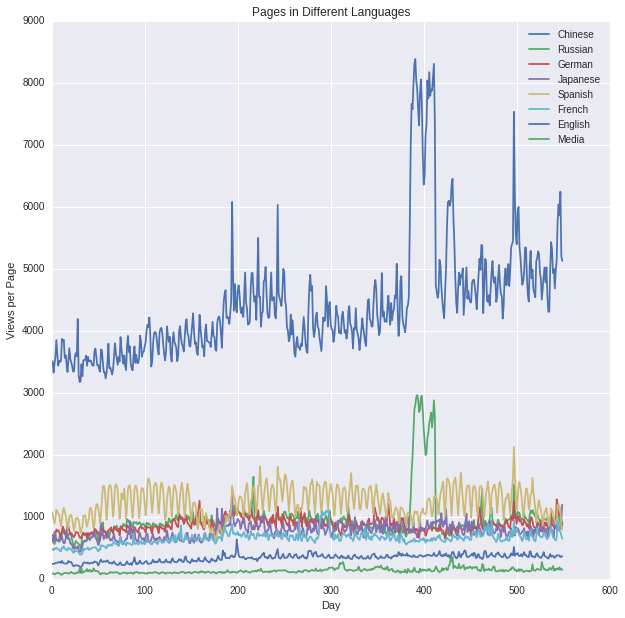

In [7]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

In [6]:
lang_sets = {}
lang_sets['en'] = train_[train_.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train_[train_.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train_[train_.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train_[train_.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train_[train_.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train_[train_.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train_[train_.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train_[train_.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

# using Pytrends

In [6]:
from pytrends.request import TrendReq
pytrends = TrendReq('no.future2e1@gmail.com', '', hl='en-US', custom_useragent='My Pytrends Script')


In [15]:

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['pizza', 'bagel'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()

# Interest by Region
interest_by_region_df = pytrend.interest_by_region()

# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()

# Get Google Hot Trends data
trending_searches_df = pytrend.trending_searches()

# Get Google Top Charts
top_charts_df = pytrend.top_charts(cid='actors', date=201611)

# Get Google Keyword Suggestions
suggestions_dict = pytrend.suggestions(keyword='pizza')

NameError: name 'ptrends' is not defined